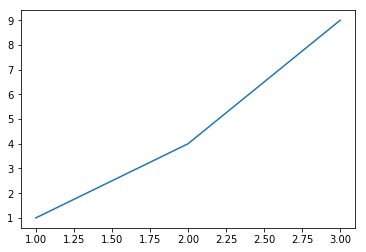

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1,2,3],[1,4,9])
plt.show()

In [2]:
import numpy as np
np.random.seed(456)
import  tensorflow as tf
tf.set_random_seed(456)
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

In [3]:
# Generate synthetic data
N = 100
w_true = 5
b_true = 2
noise_scale = .1
x_np = np.float32(np.random.rand(N, 1))
noise = np.random.normal(scale=noise_scale, size=(N, 1))
# Convert shape of y_np to (N,)
y_np = np.float32(np.reshape(w_true * x_np  + b_true + noise, (-1)))

In [4]:
x_np.shape

(100, 1)

In [5]:
y_np.shape 

(100,)

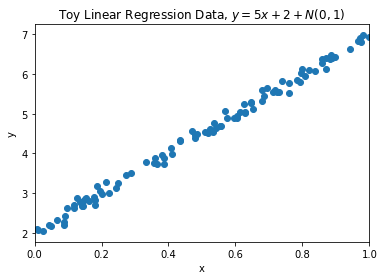

In [6]:
# Save image of the data distribution
plt.scatter(x_np, y_np)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 1)
plt.title("Toy Linear Regression Data, "
          r"$y = 5x + 2 + N(0, 1)$")
plt.show()

In [7]:
# Generate tensorflow graph
with tf.name_scope("placeholders"):
  x = tf.placeholder(tf.float32, (N, 1))
  y = tf.placeholder(tf.float32, (N,))
with tf.name_scope("weights"):
  W = tf.Variable(tf.random_normal((1, 1)))
  b = tf.Variable(tf.random_normal((1,)))
with tf.name_scope("prediction"):
  y_pred = tf.matmul(x, W) + b
with tf.name_scope("loss"):
  l = tf.reduce_sum((y - tf.squeeze(y_pred))**2)
with tf.name_scope("optim"):
  train_op = tf.train.AdamOptimizer(.001).minimize(l)

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
grads = tf.gradients(l, tf.trainable_variables())

In [10]:
n_steps = 1
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    feed_dict = {x: x_np, y: y_np}
    # Train model
    for i in range(n_steps):
        _, loss = sess.run([train_op, l], feed_dict=feed_dict)
        print("step %d, loss: %f" % (i, loss))
        w_final, b_final, gradients = sess.run([W, b, grads], feed_dict=feed_dict)
        print("w is", w_final, "b is", b_final, "gradients is", gradients)
        w_final, b_final, gradients = sess.run([W, b, grads], feed_dict=feed_dict)
        print("w is", w_final, "b is", b_final, "gradients is", gradients)
    for i in range(n_steps, 2*n_steps):
        _, loss = sess.run([train_op, l], feed_dict=feed_dict)
        print("step %d, loss: %f" % (i, loss))
        w_final, b_final, gradients = sess.run([W, b, grads], feed_dict=feed_dict)
        print("w is", w_final, "b is", b_final, "gradients is", gradients)
        w_final, b_final, gradients = sess.run([W, b, grads], feed_dict=feed_dict)
        print("w is", w_final, "b is", b_final, "gradients is", gradients)

    
    # Make Predictions
    y_pred_np = sess.run(y_pred, feed_dict={x: x_np})

step 0, loss: 2621.653564
w is [[0.21080315]] b is [-0.58812904] gradients is [array([[-561.50116]], dtype=float32), array([-986.24], dtype=float32)]
w is [[0.21080315]] b is [-0.58812904] gradients is [array([[-561.50116]], dtype=float32), array([-986.24], dtype=float32)]
step 1, loss: 2620.105225
w is [[0.21180314]] b is [-0.58712906] gradients is [array([[-561.33887]], dtype=float32), array([-985.94214], dtype=float32)]
w is [[0.21180314]] b is [-0.58712906] gradients is [array([[-561.33887]], dtype=float32), array([-985.94214], dtype=float32)]


In [ ]:
# Make Predictions
y_pred_np = x_np*w_final + b_final
y_pred_np = np.reshape(y_pred_np, -1)
plt.plot(x_np, y_pred_np)
plt.plot(x_np, y_np, 'o')
plt.show()